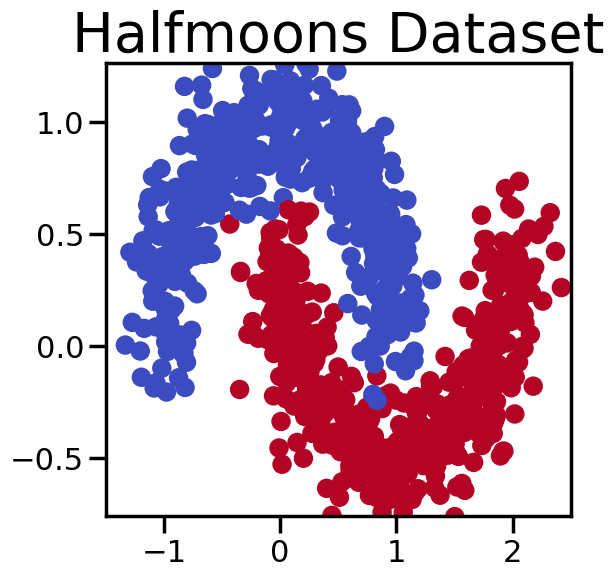

In [1]:
# Custom Imports
import sys
sys.path.append("../..")
sys.path.append("..")
import GradCertModule
import XAIArchitectures
# Deep Learning Imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import models, transforms
import pytorch_lightning as pl
# Standard Lib Imports
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import sklearn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_moons(n_samples=1000, noise=0.15, random_state=42)
X_train = X[0:800]
X_test = X[800:]

y_train = y[0:800]
y_test = y[800:]


import seaborn as sns

sns.set_context('poster')
plt.figure(figsize=(6,6), dpi=100)
plt.title(r"Halfmoons Dataset", fontsize=40)

plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap='coolwarm')
plt.ylim((-0.76, 1.26))
plt.xlim((-1.5, 2.5))
plt.show()

In [2]:

class custDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.Tensor(X).float()
        self.y = y
        self.transform = transforms.Compose([transforms.ToTensor()])

    def __len__(self):
        return self.X.shape[0]
        
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    

CustTrain = custDataset(X_train, y_train)    
CustTest = custDataset(X_test, y_test)

class CustomDataModule(pl.LightningDataModule):
    def __init__(self, train, val, test, batch_size=32):
        super().__init__()
        self.train_data = train
        self.val_data = val
        self.test_data = test
        self.batch_size = batch_size
        
    def train_dataloader(self):
        return DataLoader(self.train_data, batch_size=self.batch_size)

    def val_dataloader(self):
        return DataLoader(self.val_data, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader(self.test_data, batch_size=self.batch_size)
    
dm = CustomDataModule(CustTrain, CustTest, CustTest)



In [3]:

ALPHA = 0.05          # Regularization Parameter (Weights the Reg. Term)
EPSILON = 0.0          # Input Peturbation Budget at Training Time
GAMMA = 0.1        # Model Peturbation Budget at Training Time 
                       #(Changed to proportional budget rather than absolute)
 
LEARN_RATE = 0.001
#LEARN_RATE = 0.0005     # Learning Rate Hyperparameter
    # Was 0.001 for previous runs
    # 0.0005 for 0.5/0.5
HIDDEN_DIM = 256       # Hidden Neurons Hyperparameter
HIDDEN_LAY = 2         # Hidden Layers Hyperparameter
MAX_EPOCHS = 35

EPSILON_LINEAR = True   # Put Epsilon on a Linear Schedule?
GAMMA_LINEAR = True     # Put Gamma on a Linear Schedule?


In [4]:

if(ALPHA != 0.0):
    mode = 'GRAD'
else:
    mode = 'NONE'
    
model = XAIArchitectures.FullyConnected(hidden_dim=HIDDEN_DIM, hidden_lay=HIDDEN_LAY, dataset="HALFMOONS", mode=mode)
model.set_params(alpha=ALPHA, epsilon=EPSILON, gamma=GAMMA, 
                learn_rate=LEARN_RATE, max_epochs=MAX_EPOCHS,
                epsilon_linear=EPSILON_LINEAR, gamma_linear=GAMMA_LINEAR)

#model.inputfooling_ON()


SET MODE TO:  GRAD


In [5]:

trainer = pl.Trainer(max_epochs=MAX_EPOCHS, accelerator="cpu", devices=1)
trainer.fit(model, datamodule=dm)
result = trainer.test(model, datamodule=dm)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type       | Params
------------------------------------
0 | lays | ModuleList | 67.1 K
1 | l1   | Linear     | 768   
2 | lf   | Linear     | 514   
------------------------------------
67.1 K    Trainable params
0         Non-trainable params
67.1 K    Total params
0.268     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/Users/matthewwicker/opt/anaconda3/envs/XAIenvironment/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:245: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,
/Users/matthewwicker/opt/anaconda3/envs/XAIenvironment/lib/python3.7/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (_ResultMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking func

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/Users/matthewwicker/opt/anaconda3/envs/XAIenvironment/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:245: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.7901785969734192
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [6]:
X_preds = []
y_preds = []
classes = []
for x in np.linspace(-1.5,2.5,150):
    for y in np.linspace(-0.75,1.25,150):
        y_hat = model(torch.Tensor([[x,y]]))
        X_preds.append([x,y])
        cls = np.argmax(y_hat.detach().numpy())
        classes.append(y_hat.detach().numpy())
        c = -1 if cls == 0 else 1
        y_preds.append(c * torch.max((F.softmax(y_hat)-0.5)).detach().numpy())

X_preds = np.asarray(X_preds)
y_preds = np.asarray(y_preds)
classes = np.squeeze(classes).T
print(np.shape(classes))
print(np.shape(X_preds[:,0]))
print(np.shape(X_preds[:,1]))

/Users/matthewwicker/opt/anaconda3/envs/XAIenvironment/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


(2, 22500)
(22500,)
(22500,)


In [7]:

# Meshgrid creation
xx, yy = np.meshgrid(np.arange(-1.5, 2.5, 0.02 ), np.arange(-0.75, 1.25, 0.02 ))


# Obtain labels for each point in mesh using the model.
y_pred = model( torch.Tensor(np.c_[xx.ravel(), yy.ravel()])).detach().numpy()
z = np.asarray(np.argmax(y_pred, axis=1)).reshape(xx.shape)  
    

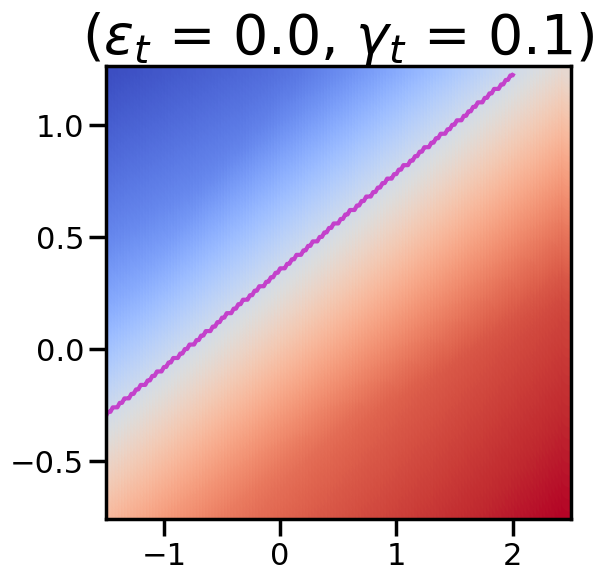

In [8]:
import seaborn as sns

sns.set_context('poster')
plt.figure(figsize=(6,6), dpi=100)
#plt.title(r"Pred. Cert. Training ($\epsilon = 0.25$)")
plt.title(r"($\epsilon_t$ = 0.0, $\gamma_t$ = 0.1)", fontsize=40)
plt.contour(xx, yy, z, levels=[0.5], alpha=0.7, colors=['m'], linewidths=3)
plt.scatter(x=X_preds[:,0], y=X_preds[:,1], c=y_preds, cmap='coolwarm')
plt.ylim((-0.76, 1.26))
plt.xlim((-1.5, 2.5))
plt.show()
